In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pdims=(1 , 1)
#for single gpu
# pdims = (1 , 1)
folder = f'.'

In [12]:
only_final_fields = False

init_field_slices = []
field_slices = []
nb_solutions = 4
nb_to_plot = 4
final_slices = []
final_fields = []

if pdims == (1, 1):
    initial_conditions = np.load(f'{folder}/initial_conditions.npy')
    field = np.load(f'{folder}/field.npy')
    for i in range((nb_solutions - nb_to_plot) , nb_solutions):
        final_fields.append(np.load(f'{folder}/final_field_{i}.npy'))

else:
    for _ in range(nb_solutions):
        final_slices.append([])

    for i in range(pdims[0]):
        row_init_field = []
        row_field = []
        row_final_field = []
        for _ in range(nb_solutions):
            row_final_field.append([])
        
        for j in range(pdims[1]):
            slice_index = i * pdims[1]  + j 
            if not only_final_fields:
                row_field.append(np.load(f'{folder}/field_{slice_index}.npy'))
                row_init_field.append(np.load(f'{folder}/initial_conditions_{slice_index}.npy'))

            for sol_indx in range((nb_solutions - nb_to_plot) , nb_solutions):
                row_final_field[sol_indx].append(np.load(f'{folder}/final_field_{sol_indx}_{slice_index}.npy'))
        
        if not only_final_fields:
            field_slices.append(np.vstack(row_field))
            init_field_slices.append(np.vstack(row_init_field))

        for sol_indx in range((nb_solutions - nb_to_plot) , nb_solutions):
            final_slices[sol_indx].append(np.vstack(row_final_field[sol_indx]))

    if not only_final_fields:
        field = np.hstack(field_slices)
        initial_conditions = np.hstack(init_field_slices)
    for sol_indx in range(nb_solutions - nb_to_plot , nb_solutions):
        final_fields.append(np.hstack(final_slices[sol_indx]))

if not only_final_fields:
    print(field.shape)
    box_size = field.shape
else:
    print(final_fields[-1].shape)
    box_size = final_fields[-1].shape

(256, 256, 256)


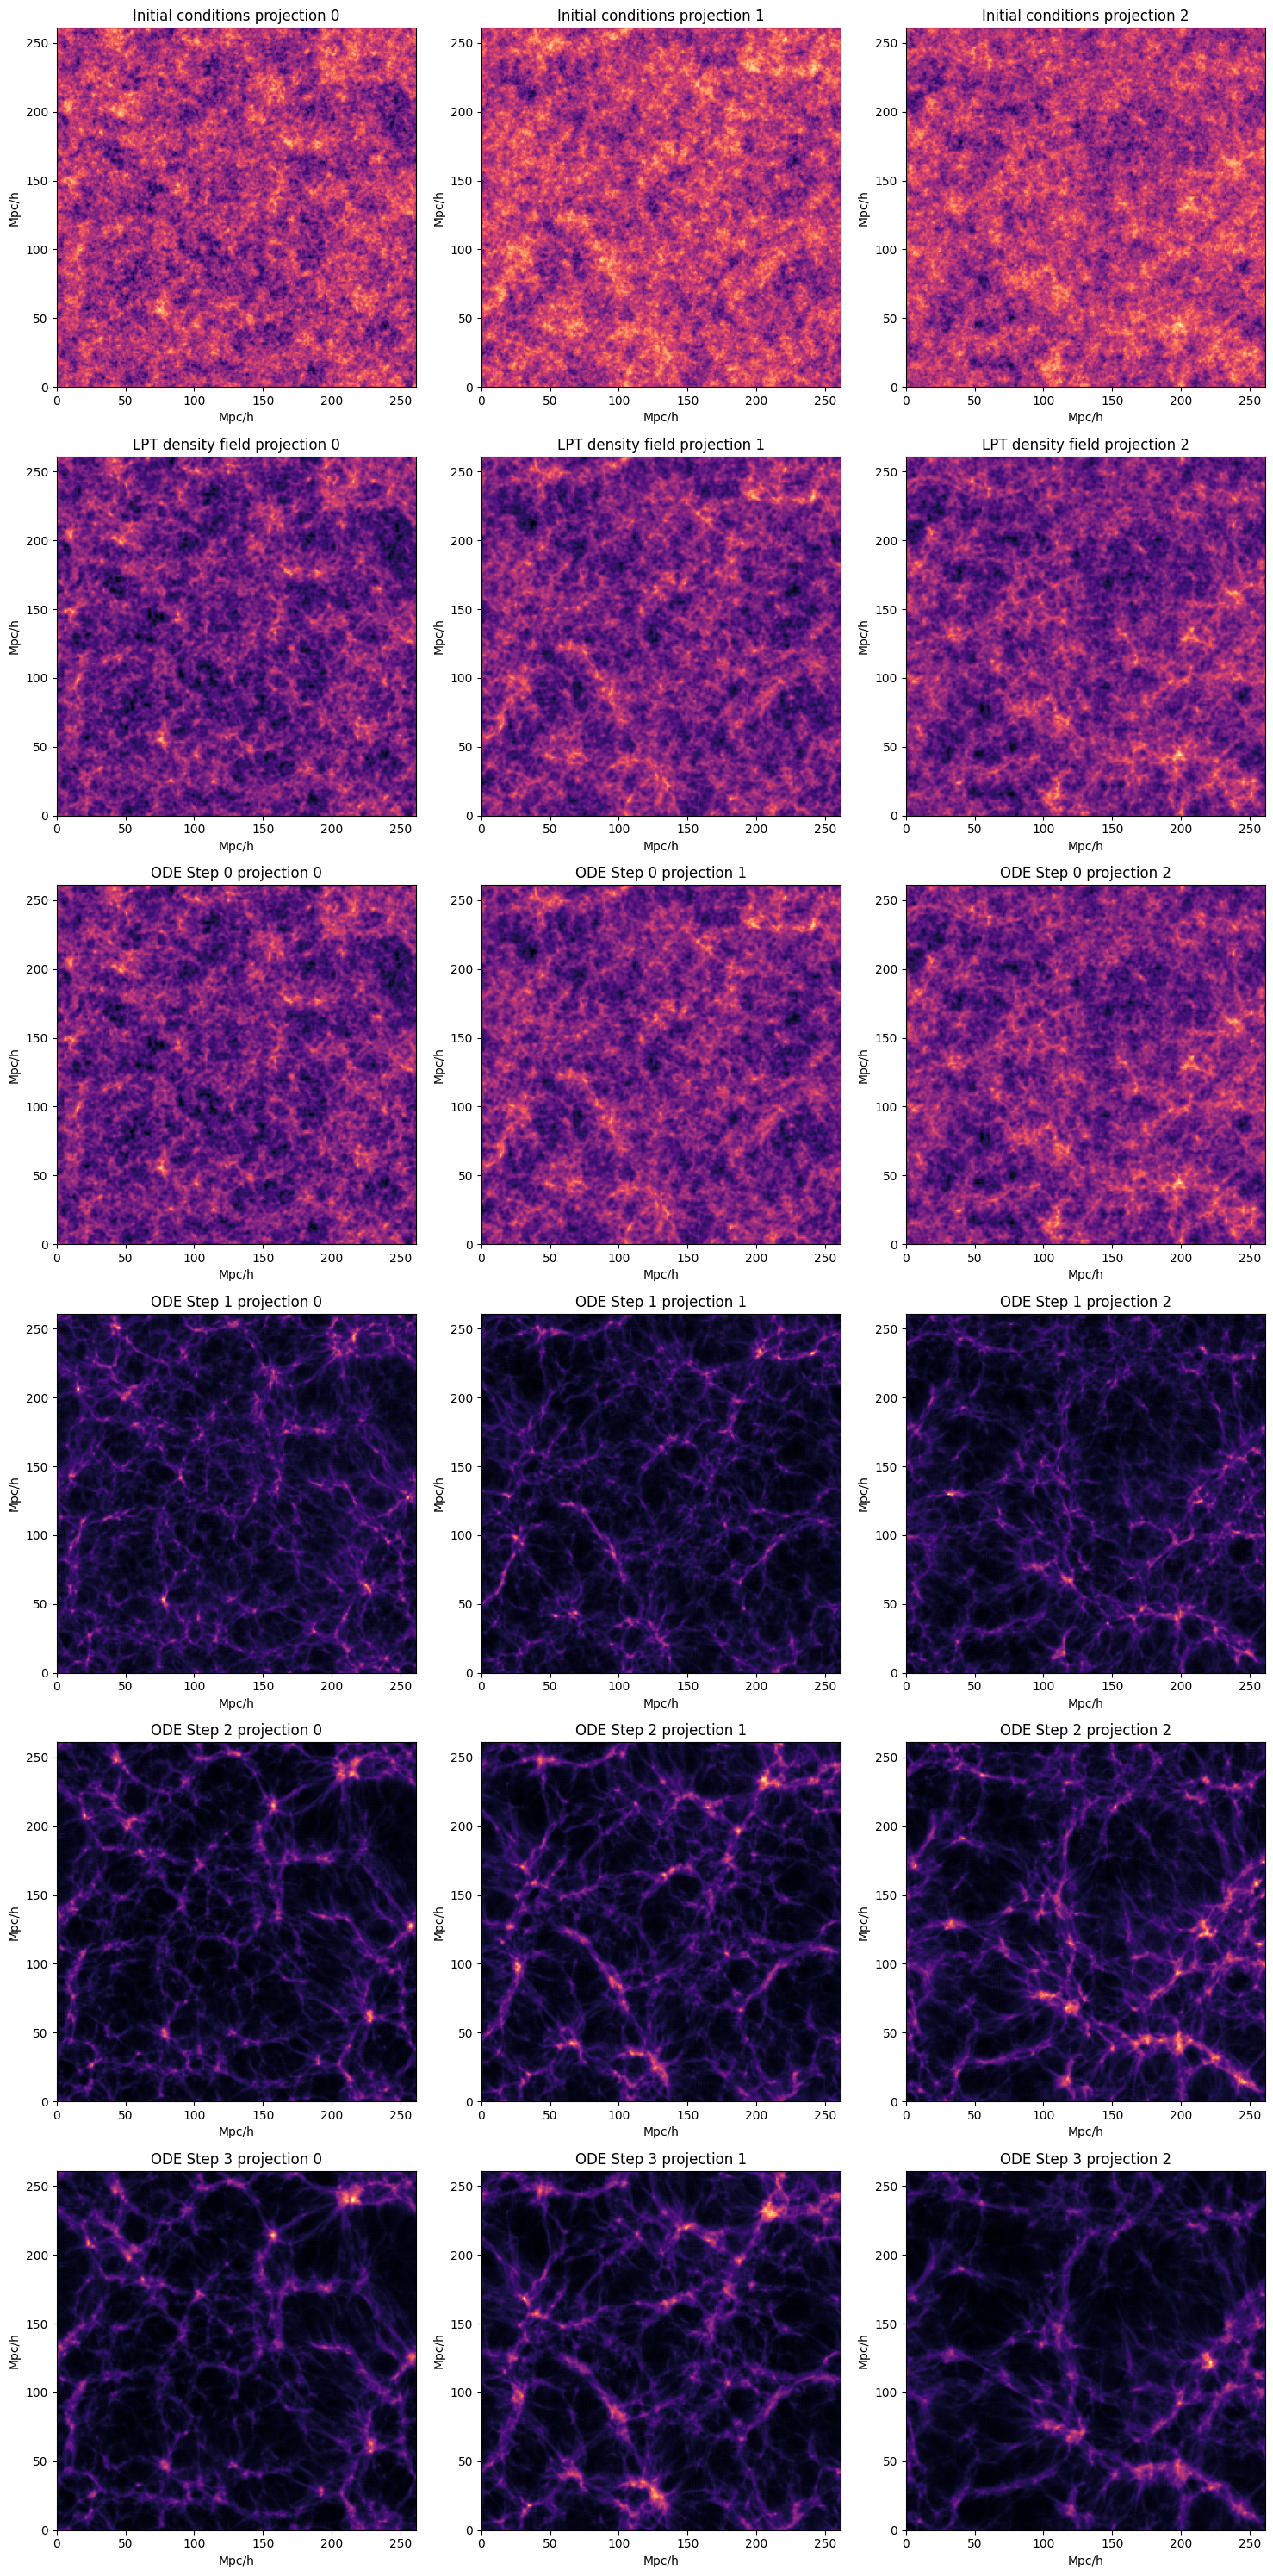

In [13]:
sum_over = box_size[0] // 8

# Function to create subplots
def plot_subplots(proj_axis, input , row, axes, title):
    slicing = [slice(None)] * input.ndim
    slicing[proj_axis] = slice(None, sum_over)
    slicing = tuple(slicing)

    # Plot initial conditions
    axes[row, proj_axis].imshow(input[slicing].sum(axis=proj_axis), cmap='magma', extent=[0, box_size[0] + 5, 0, box_size[0] + 5])
    axes[row, proj_axis].set_xlabel('Mpc/h')
    axes[row, proj_axis].set_ylabel('Mpc/h')
    axes[row, proj_axis].set_title(title)

# Initialize figure and axes
if only_final_fields:
    nb_rows = len(final_fields)
    field_start = 0
else:
    nb_rows = 2 + len(final_fields)
    field_start = 2
    
nb_cols = 3
fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(15, 5 * nb_rows))

# Plot initial conditions and LPT field for each projection
if not only_final_fields:
    for proj_axis in range(3):
        plot_subplots(proj_axis,initial_conditions ,  0, axes, f'Initial conditions projection {proj_axis}')
        plot_subplots(proj_axis, field ,  1, axes, f'LPT density field projection {proj_axis}')

if len(final_fields) == 1:  # Check if axes is 1-dimensional
    axes = np.expand_dims(axes,axis=0)
# Plot final fields for each projection
for indx, final_field in enumerate(final_fields):
    for proj_axis in range(3):
        slicing = [slice(None)] * final_field.ndim
        slicing[proj_axis] = slice(None, sum_over)
        slicing = tuple(slicing)
        axes[indx + field_start, proj_axis].imshow(final_fields[indx][slicing].sum(axis=proj_axis) + 1, cmap='magma', extent=[0, box_size[0] + 5, 0, box_size[0] + 5])
        axes[indx + field_start, proj_axis].set_xlabel('Mpc/h')
        axes[indx + field_start, proj_axis].set_ylabel('Mpc/h')
        axes[indx + field_start, proj_axis].set_title(f'ODE Step {indx} projection {proj_axis}')

plt.tight_layout()
plt.show()